# Load libraries and import data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import missingno as msno

In [3]:
# Load in the data with `read_csv()`
crashes = pd.read_csv("crashes.sample2020.csv", low_memory = False)
people = pd.read_csv("people.sample.csv", low_memory = False)
vehicle = pd.read_csv("vehicles.sample.csv", low_memory = False)

# Data Quality Assessment

In [22]:
# Basic Summary of Datasets (Crashes)
crashes.info()
crashes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT                      33408 non-null 

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)


In [23]:
# Basic Summary of Datasets (People)
people.info()
people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82049 entries, 0 to 82048
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PERSON_ID              82049 non-null  object 
 1   PERSON_TYPE            82049 non-null  object 
 2   CRASH_RECORD_ID        82049 non-null  object 
 3   RD_NO                  73689 non-null  object 
 4   VEHICLE_ID             80306 non-null  float64
 5   CRASH_DATE             82049 non-null  object 
 6   SEAT_NO                17214 non-null  float64
 7   CITY                   60863 non-null  object 
 8   STATE                  61749 non-null  object 
 9   ZIPCODE                55588 non-null  object 
 10  SEX                    80776 non-null  object 
 11  AGE                    59254 non-null  float64
 12  DRIVERS_LICENSE_STATE  48594 non-null  object 
 13  DRIVERS_LICENSE_CLASS  41798 non-null  object 
 14  SAFETY_EQUIPMENT       81792 non-null  object 
 15  AI

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877518.0,07/26/2020 01:50:00 AM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877558.0,07/26/2020 03:44:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST REFUSED,NaN,NaN
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877560.0,07/26/2020 03:44:00 AM,NaN,EVANSTON,IL,60201,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,JD310543,877642.0,07/26/2020 11:50:00 AM,NaN,CHICAGO,IL,60638,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [24]:
# Basic Summary of Datasets (Vehicle)
vehicle.info()
vehicle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75673 entries, 0 to 75672
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_UNIT_ID             75673 non-null  int64  
 1   CRASH_RECORD_ID           75673 non-null  object 
 2   RD_NO                     67544 non-null  object 
 3   CRASH_DATE                75673 non-null  object 
 4   UNIT_NO                   75673 non-null  int64  
 5   UNIT_TYPE                 75561 non-null  object 
 6   NUM_PASSENGERS            11633 non-null  float64
 7   VEHICLE_ID                73804 non-null  float64
 8   CMRC_VEH_I                1514 non-null   object 
 9   MAKE                      73804 non-null  object 
 10  MODEL                     73787 non-null  object 
 11  LIC_PLATE_STATE           67639 non-null  object 
 12  VEHICLE_YEAR              61945 non-null  float64
 13  VEHICLE_DEFECT            73804 non-null  object 
 14  VEHICL

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,228894,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,1,DRIVER,NaN,224185.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228895,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,2,PARKED,NaN,224187.0,NaN,GENERAL MOTORS CORP.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,228896,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,3,PARKED,NaN,224191.0,NaN,SATURN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,228905,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,1,DRIVER,NaN,224199.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228906,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,2,DRIVERLESS,NaN,224203.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check duplicated records

duplicate_crashes = crashes.duplicated()
duplicate_people = people.duplicated()
duplicate_vehicle = vehicle.duplicated()

print(duplicate_crashes.sum())
print(duplicate_people.sum())
print(duplicate_people.sum())

# No duplicated records found

0
0
0


In [44]:
## Function to split the dataframe to numerical and categorical

def split_type (DataFrame):
    con_feature = list(DataFrame.select_dtypes(include = ["int64", "float64"]).columns)
    cat_feature = list(DataFrame.select_dtypes(exclude = ["int64", "float64"]).columns)
    return con_feature, cat_feature

In [50]:
# Function to generate summary table

def processContinuous(conFeat, data):
	conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.', 'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev.']
	
	conOutDF = pd.DataFrame(index=conFeat, columns=conHead)
	conOutDF.index.name = 'FEATURENAME'
	columns = data[conFeat]

	#COUNT
	count = columns.count()
	conOutDF[conHead[0]] = count
	
	#MISS % - no continuous features have missing data
	percents = ['']*len(conFeat)
	for col in columns:
		percents[conFeat.index(col)] = 0.00

	conOutDF[conHead[1]] = percents
	
	#CARDINALITY
	conOutDF[conHead[2]] = columns.nunique()
	
	#MINIMUM
	conOutDF[conHead[3]] = columns.min()
	
	#1ST QUARTILE
	conOutDF[conHead[4]] = columns.quantile(0.25)
	
	#MEAN
	conOutDF[conHead[5]] = round(columns.mean(), 2)
	
	#MEDIAN
	conOutDF[conHead[6]] = columns.median()
	
	#3rd QUARTILE
	conOutDF[conHead[7]] = columns.quantile(0.75)
	
	#MAX
	conOutDF[conHead[8]] = columns.max()
	
	#STANDARD DEVIATION
	conOutDF[conHead[9]] = round(columns.std(),2)
	
	return conOutDF



def processCategorical(catFeat, data):
	catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq', 'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

	catOutDF = pd.DataFrame(index=catFeat, columns=catHead)
	catOutDF.index.name = 'FEATURENAME'
	columns = data[catFeat]
	
	#COUNT
	count = columns.count()
	catOutDF[catHead[0]] = count
	
	#CARDINALITY
	catOutDF[catHead[2]] = columns.nunique()

	#preparing arrays for storing data
	amt = len(catFeat)
	missPercents = ['']*amt
	modeFreqs = ['']*amt
	modes = ['']*amt
	modes2 = ['']*amt
	modePercents = ['']*amt
	modeFreqs2 = ['']*amt
	modePercents2 = ['']*amt

	for col in columns:
		values = columns[col].value_counts()
		index = catFeat.index(col)
		
		#MISS %
		try:
			qMarksCount = values.loc[' ?']
			percent = (qMarksCount/count[index]) * 100
			missPercents[index] = round(percent, 2)
			
			#adjust cardinality to account for ? being counted as unique value
			catOutDF['Card.'][index] -= 1
		except Exception as e:
			missPercents[index] = 0.00
		
		#MODES
		mode = values.index[0]
		mode2 = values.index[1]
		modes[index] = mode
		modes2[index] = mode2
		
		#MODE FREQ
		modeCount = values.loc[mode]
		modeCount2 = values.loc[mode2]
		modeFreqs[index] = modeCount
		modeFreqs2[index] = modeCount2

		#MODE %
		miss = missPercents[index]
		
		modePer = (modeCount/(count[index]*((100-miss)/100)))*100
		modePercents[index] = round(modePer, 2)
		
		modePer2 = (modeCount2/(count[index]*((100-miss)/100)))*100
		modePercents2[index] = round(modePer2, 2)

	catOutDF[catHead[1]] = missPercents
	catOutDF[catHead[3]] = modes
	catOutDF[catHead[4]] = modeFreqs
	catOutDF[catHead[5]] = modePercents
	catOutDF[catHead[6]] = modes2
	catOutDF[catHead[7]] = modeFreqs2
	catOutDF[catHead[8]] = modePercents2
	
	return catOutDF

In [49]:
# Summary of Numerical Dataset of Crashes

con_feature, cat_feature = split_type(crashes)

processContinuous(con_feature, crashes)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
FEATURENAME,,,,,,,,,,
POSTED_SPEED_LIMIT,33408,0.0,25,0.000000,30.000000,28.42,30.000000,30.000000,70.00000,6.21
LANE_CNT,10996,0.0,14,0.000000,2.000000,2.50,2.000000,4.000000,99.00000,1.67
STREET_NO,33408,0.0,6516,1.000000,1240.000000,3662.14,3199.000000,5518.000000,13758.00000,2847.52
BEAT_OF_OCCURRENCE,33408,0.0,274,111.000000,722.000000,1250.21,1214.000000,1822.000000,2535.00000,704.13
NUM_UNITS,33408,0.0,12,1.000000,2.000000,2.04,2.000000,2.000000,12.00000,0.47
INJURIES_TOTAL,33324,0.0,9,0.000000,0.000000,0.20,0.000000,0.000000,8.00000,0.56
INJURIES_FATAL,33324,0.0,3,0.000000,0.000000,0.00,0.000000,0.000000,2.00000,0.03
INJURIES_INCAPACITATING,33324,0.0,6,0.000000,0.000000,0.02,0.000000,0.000000,5.00000,0.17
INJURIES_NON_INCAPACITATING,33324,0.0,9,0.000000,0.000000,0.11,0.000000,0.000000,8.00000,0.42


In [52]:
# Summary of Categorical Dataset of Crashes

processCategorical(cat_feature, crashes)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
FEATURENAME,,,,,,,,,
CRASH_RECORD_ID,33408,0.0,33408,f83113f3e95e0d11cf2dabb0ceca0fda9955d8142c0c7f...,1,0.00,5f3da5c0f76eebbd69bffb48a6ecff3edc957b60cfbf68...,1,0.00
RD_NO,33021,0.0,33021,JB407012,1,0.00,JA538561,1,0.00
CRASH_DATE_EST_I,2337,0.0,2,Y,2003,85.71,N,334,14.29
CRASH_DATE,33408,0.0,31233,12/18/2017 09:00:00 AM,5,0.01,05/31/2020 05:00:00 PM,4,0.01
TRAFFIC_CONTROL_DEVICE,33408,0.0,19,NO CONTROLS,19052,57.03,TRAFFIC SIGNAL,9318,27.89
DEVICE_CONDITION,33408,0.0,8,NO CONTROLS,19287,57.73,FUNCTIONING PROPERLY,11775,35.25
WEATHER_CONDITION,33408,0.0,12,CLEAR,26192,78.40,RAIN,3145,9.41
LIGHTING_CONDITION,33408,0.0,6,DAYLIGHT,21747,65.10,"DARKNESS, LIGHTED ROAD",7230,21.64
FIRST_CRASH_TYPE,33408,0.0,18,REAR END,7737,23.16,PARKED MOTOR VEHICLE,7573,22.67


In [53]:
# Summary of Numerical Dataset of People

con_feature, cat_feature = split_type(people)

processContinuous(con_feature, people)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
FEATURENAME,,,,,,,,,,
VEHICLE_ID,80306,0.0,63917,224185.0,414668.25,602088.56,606222.50,795201.00,920208.00,214429.12
SEAT_NO,17214,0.0,11,1.0,3.00,4.19,3.00,6.00,12.00,2.24
AGE,59254,0.0,105,0.0,25.00,37.81,35.00,50.00,110.00,17.15
BAC_RESULT VALUE,134,0.0,34,0.0,0.12,0.17,0.17,0.21,0.44,0.09


In [54]:
# Summary of Categorical Dataset of People

processCategorical(cat_feature, people)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
FEATURENAME,,,,,,,,,
PERSON_ID,82049,0.0,82049,O300901,1,0.00,O296934,1,0.00
PERSON_TYPE,82049,0.0,6,DRIVER,63122,76.93,PASSENGER,17214,20.98
CRASH_RECORD_ID,82049,0.0,36826,1829f52c1281a0396ef94692331b3dc530bc4be5a54cd5...,46,0.06,61bee823dd33ba8c08b79c23806840fe0ca32f48aedc44...,40,0.05
RD_NO,73689,0.0,32938,JB253311,46,0.06,JB451258,40,0.05
CRASH_DATE,82049,0.0,33488,05/07/2018 09:35:00 AM,46,0.06,09/26/2018 07:30:00 AM,42,0.05
CITY,60863,0.0,2099,CHICAGO,43142,70.88,CICERO,620,1.02
STATE,61749,0.0,52,IL,58365,94.52,IN,952,1.54
ZIPCODE,55588,0.0,2239,60629,1998,3.59,60639,1746,3.14
SEX,80776,0.0,3,M,43002,53.24,F,30946,38.31


In [59]:
# Summary of Numerical Dataset of Vehicle

con_feature, cat_feature = split_type(vehicle)

processContinuous(con_feature, vehicle)

/opt/anaconda3/envs/vision_zero/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
FEATURENAME,,,,,,,,,,
CRASH_UNIT_ID,75673,0.0,75673,228894.0,436244.00,636542.75,642576.0,845390.00,970977.0,229743.76
UNIT_NO,75673,0.0,13,0.0,1.00,1.57,2.0,2.00,12.0,0.65
NUM_PASSENGERS,11633,0.0,19,1.0,1.00,1.48,1.0,2.00,43.0,1.12
VEHICLE_ID,73804,0.0,73804,224185.0,418742.00,606345.29,611440.5,802301.50,920209.0,215477.48
VEHICLE_YEAR,61945,0.0,83,1900.0,2006.00,2012.93,2012.0,2016.00,9999.0,129.70
OCCUPANT_CNT,73804,0.0,21,0.0,1.00,1.09,1.0,1.00,99.0,0.88
CMV_ID,886,0.0,886,1515.0,4145.75,6578.38,6602.0,9189.75,10831.0,2878.48
HAZMAT_REPORT_NO,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCS_REPORT_NO,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Summary of Categorical Dataset of Vehicle

processCategorical(cat_feature, vehicle)

IndexError: index 1 is out of bounds for axis 0 with size 1

# Missing Value Analysis




## Missing Value Identification

In [12]:
# Checking the missing values of crashes
crashes.isnull().sum()

CRASH_RECORD_ID                      0
RD_NO                              387
CRASH_DATE_EST_I                 31071
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         22412
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                        935
CRASH_TYPE                           0
INTERSECTION_RELATED_I           25515
NOT_RIGHT_OF_WAY_I               31825
HIT_AND_RUN_I                    23714
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION         

In [13]:
# Checking the missing values of people
people.isnull().sum()

PERSON_ID                    0
PERSON_TYPE                  0
CRASH_RECORD_ID              0
RD_NO                     8360
VEHICLE_ID                1743
CRASH_DATE                   0
SEAT_NO                  64835
CITY                     21186
STATE                    20300
ZIPCODE                  26461
SEX                       1273
AGE                      22795
DRIVERS_LICENSE_STATE    33455
DRIVERS_LICENSE_CLASS    40251
SAFETY_EQUIPMENT           257
AIRBAG_DEPLOYED           1675
EJECTION                  1094
INJURY_CLASSIFICATION       50
HOSPITAL                 65601
EMS_AGENCY               71763
EMS_RUN_NO               80362
DRIVER_ACTION            17380
DRIVER_VISION            17386
PHYSICAL_CONDITION       17321
PEDPEDAL_ACTION          80402
PEDPEDAL_VISIBILITY      80404
PEDPEDAL_LOCATION        80403
BAC_RESULT               17298
BAC_RESULT VALUE         81915
CELL_PHONE_USE           81984
dtype: int64

In [14]:
# Checking the missing values of vehicle
vehicle.isnull().sum()

CRASH_UNIT_ID                  0
CRASH_RECORD_ID                0
RD_NO                       8129
CRASH_DATE                     0
UNIT_NO                        0
                           ...  
CARGO_BODY_TYPE            74998
LOAD_TYPE                  75036
HAZMAT_OUT_OF_SERVICE_I    75053
MCS_OUT_OF_SERVICE_I       75035
HAZMAT_CLASS               75615
Length: 72, dtype: int64

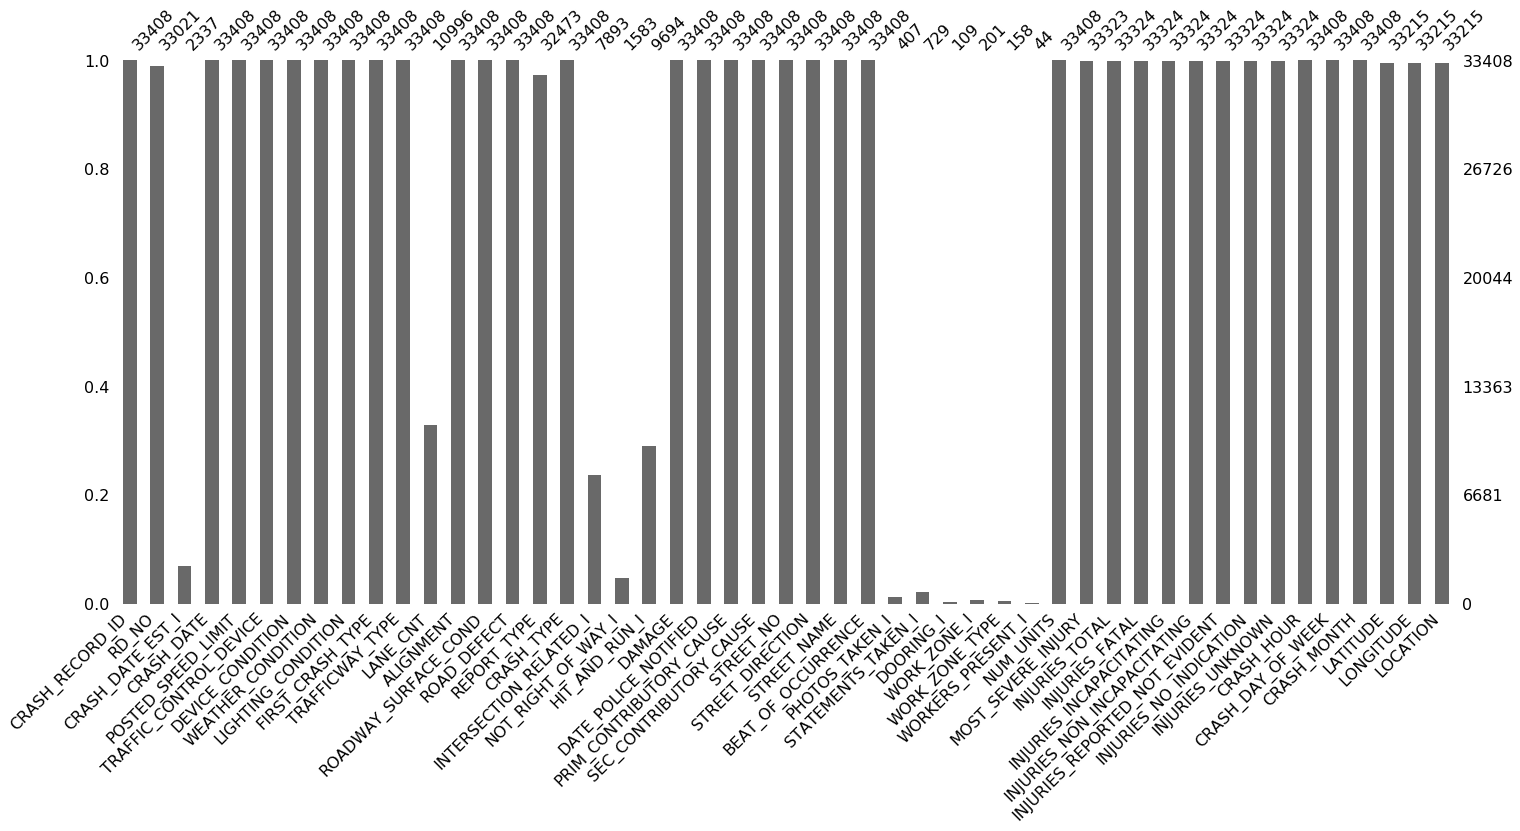

In [24]:
# Graphical analysis of missing values (Crashes)
msno.bar(crashes)

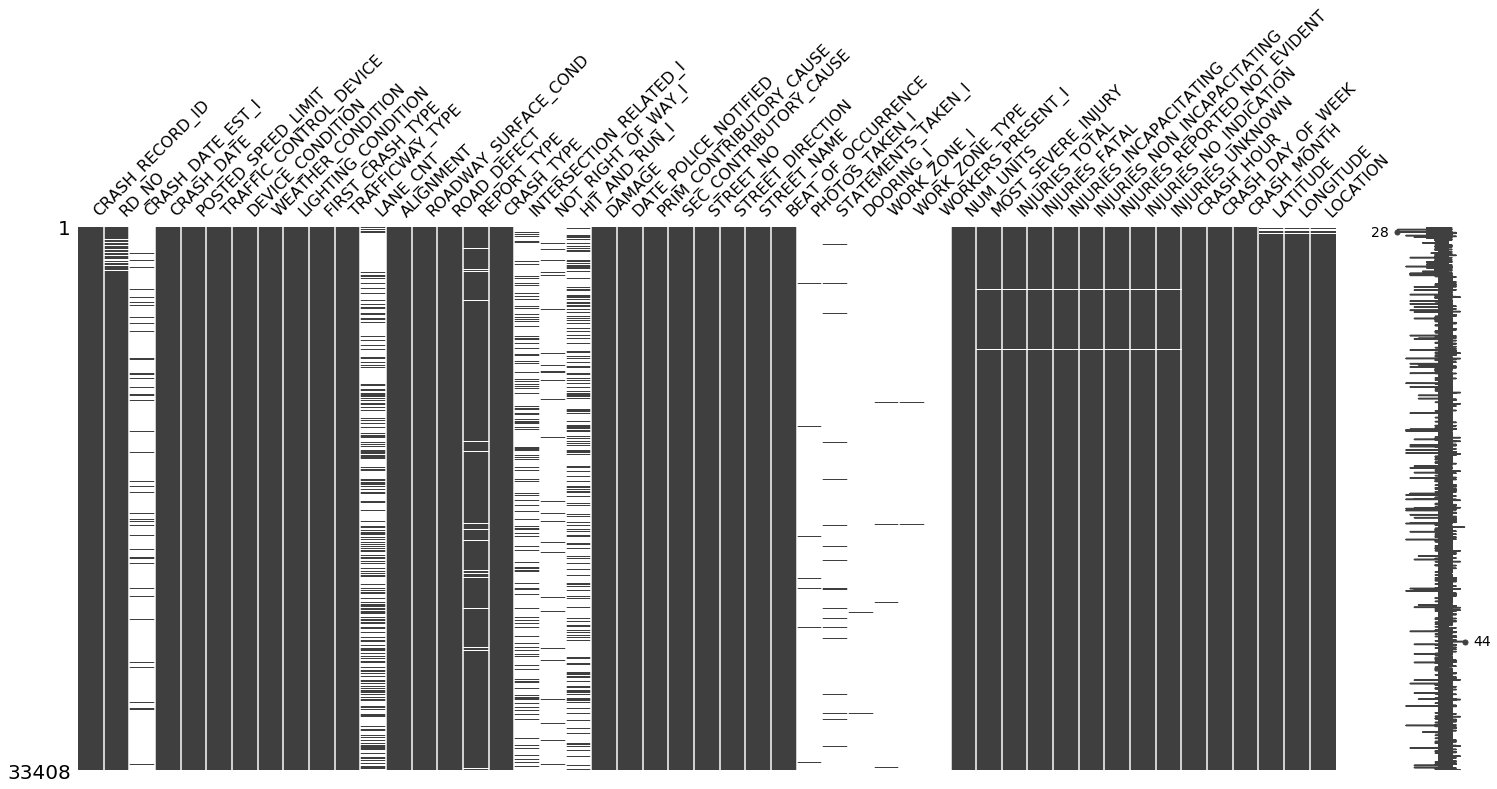

In [25]:
msno.matrix(crashes)

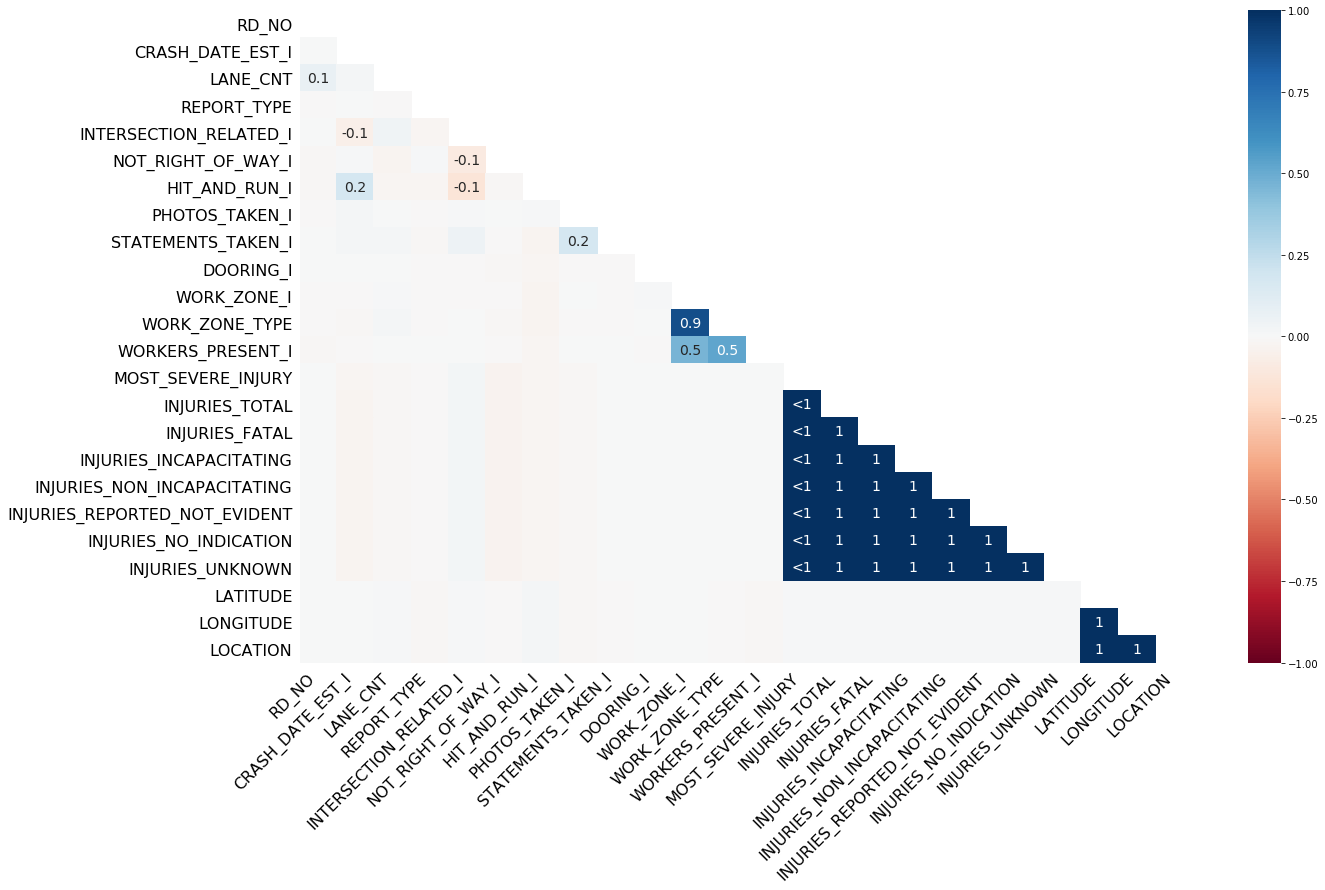

In [28]:
msno.heatmap(crashes)

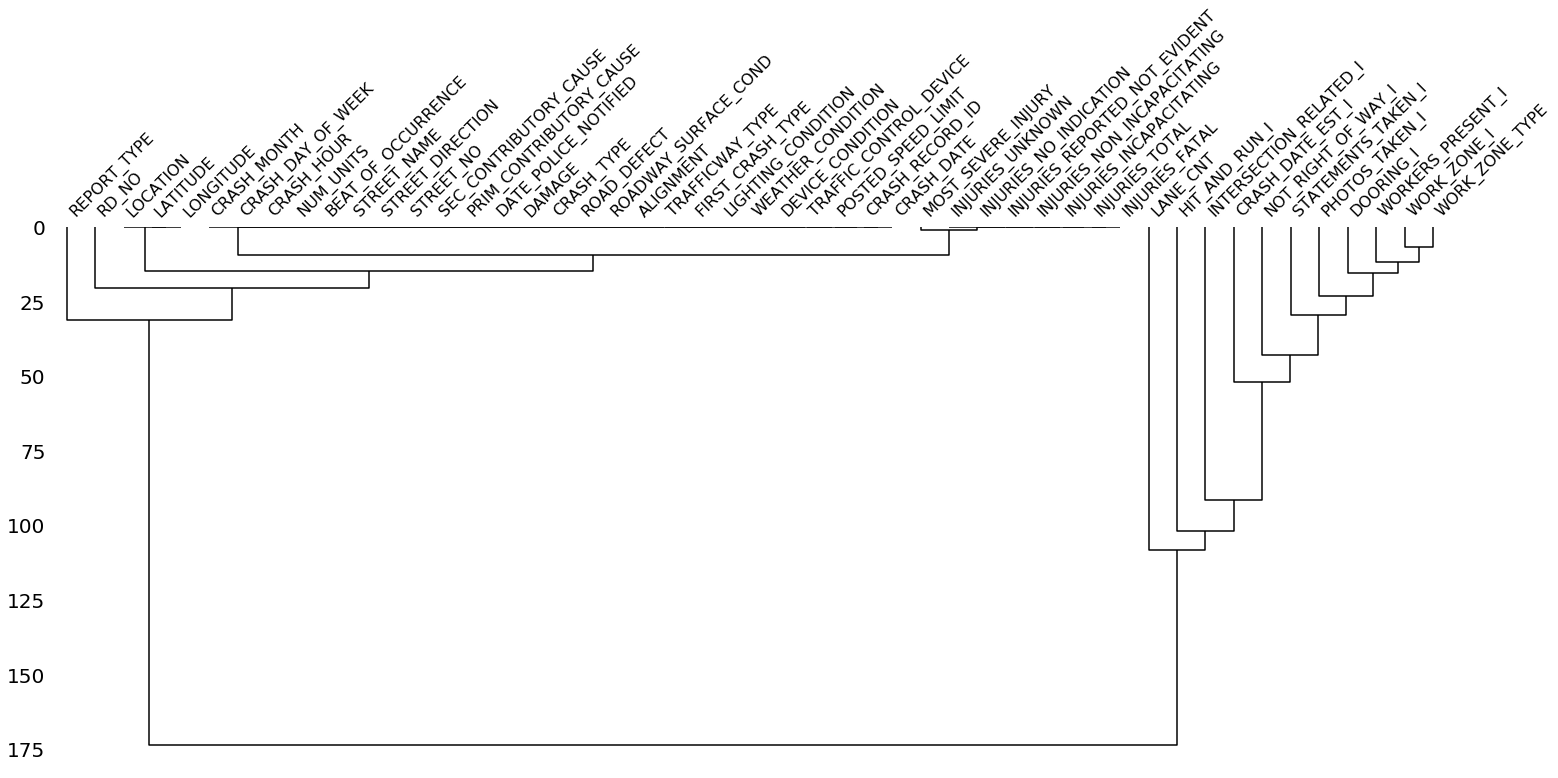

In [32]:
msno.dendrogram(crashes)

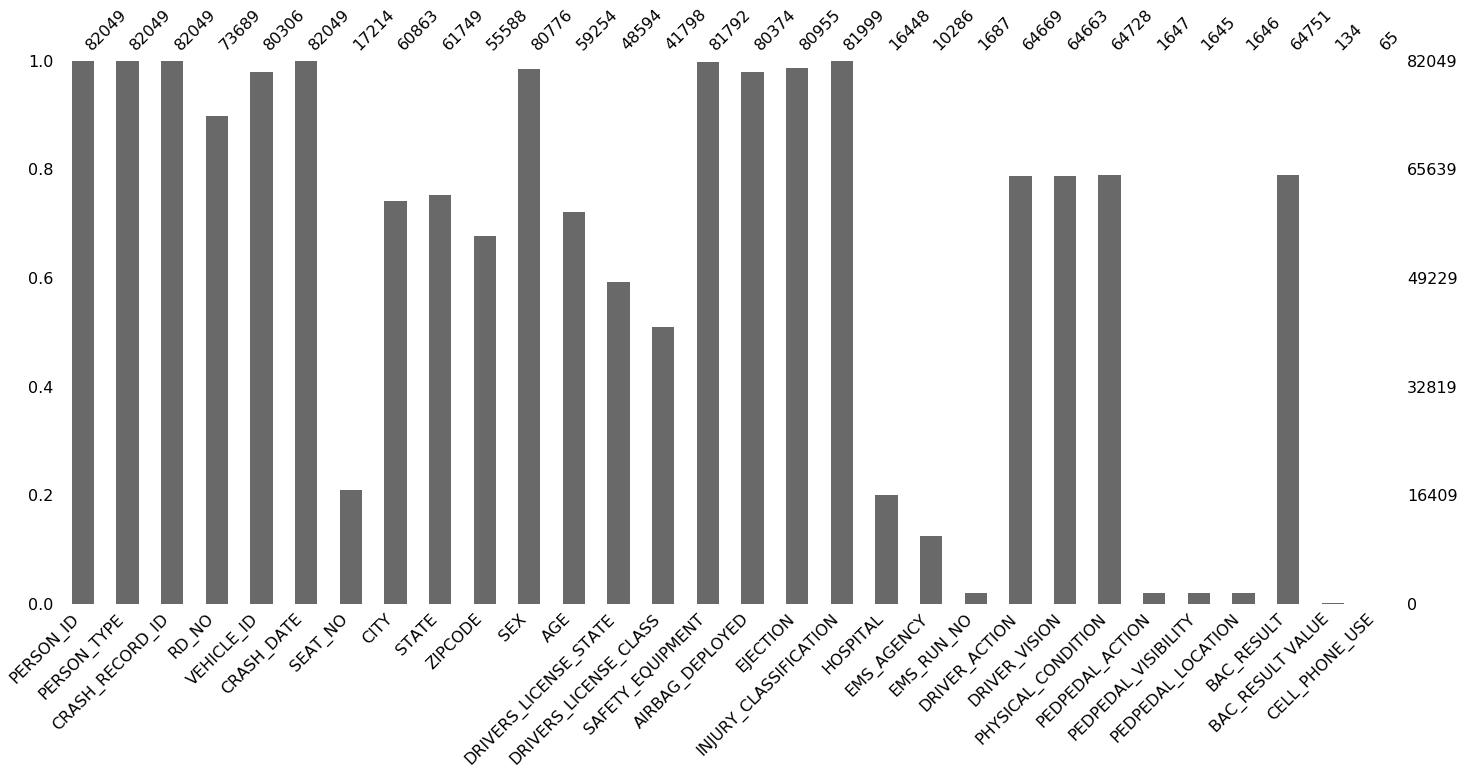

In [20]:
# Graphical analysis of missing values (people)
msno.bar(people)

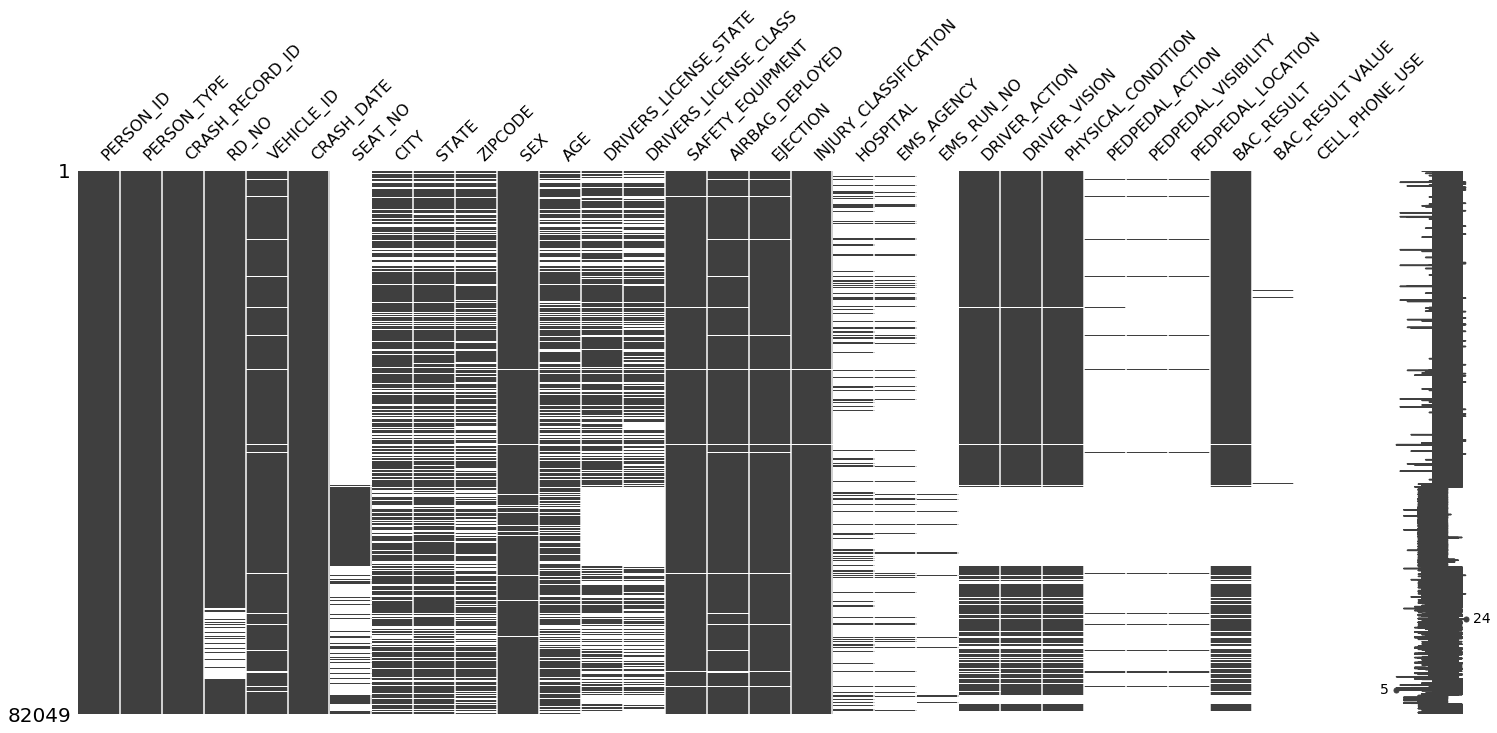

In [21]:
msno.matrix(people)

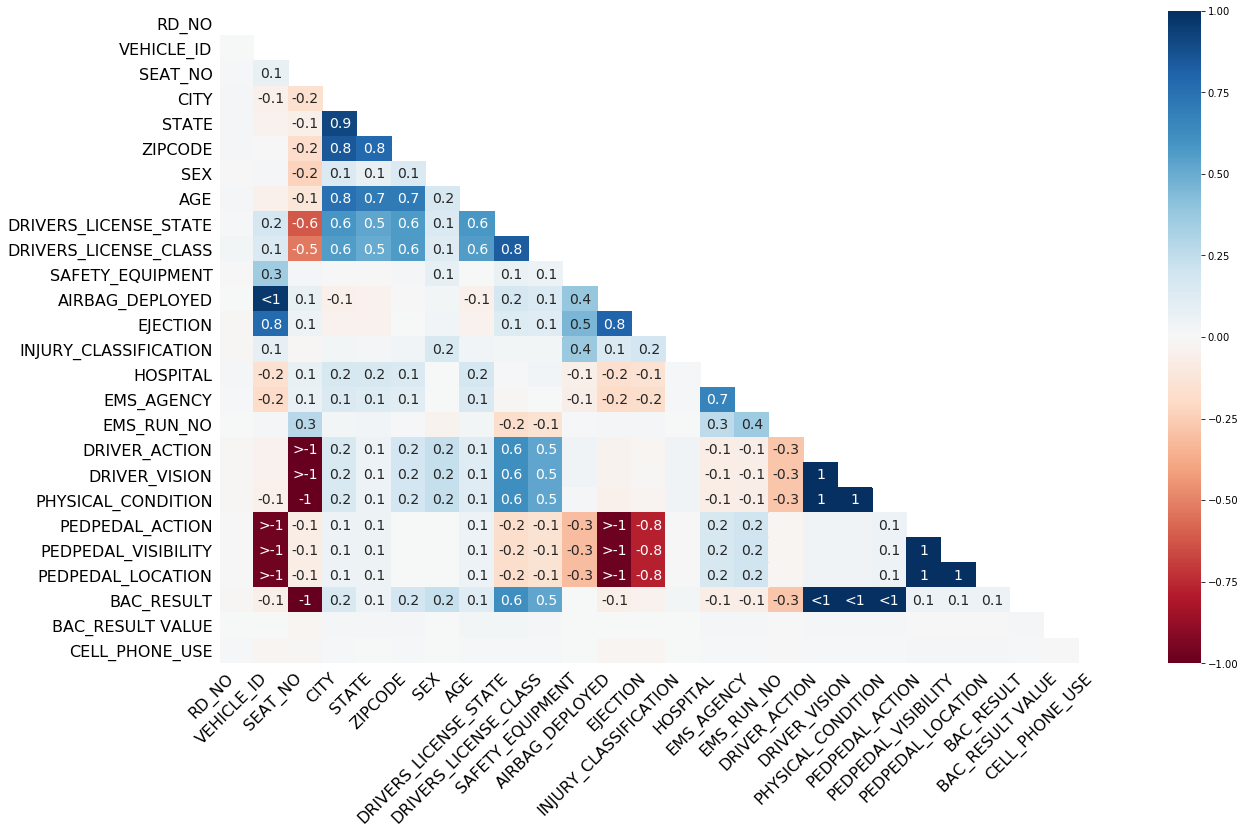

In [29]:
msno.heatmap(people)

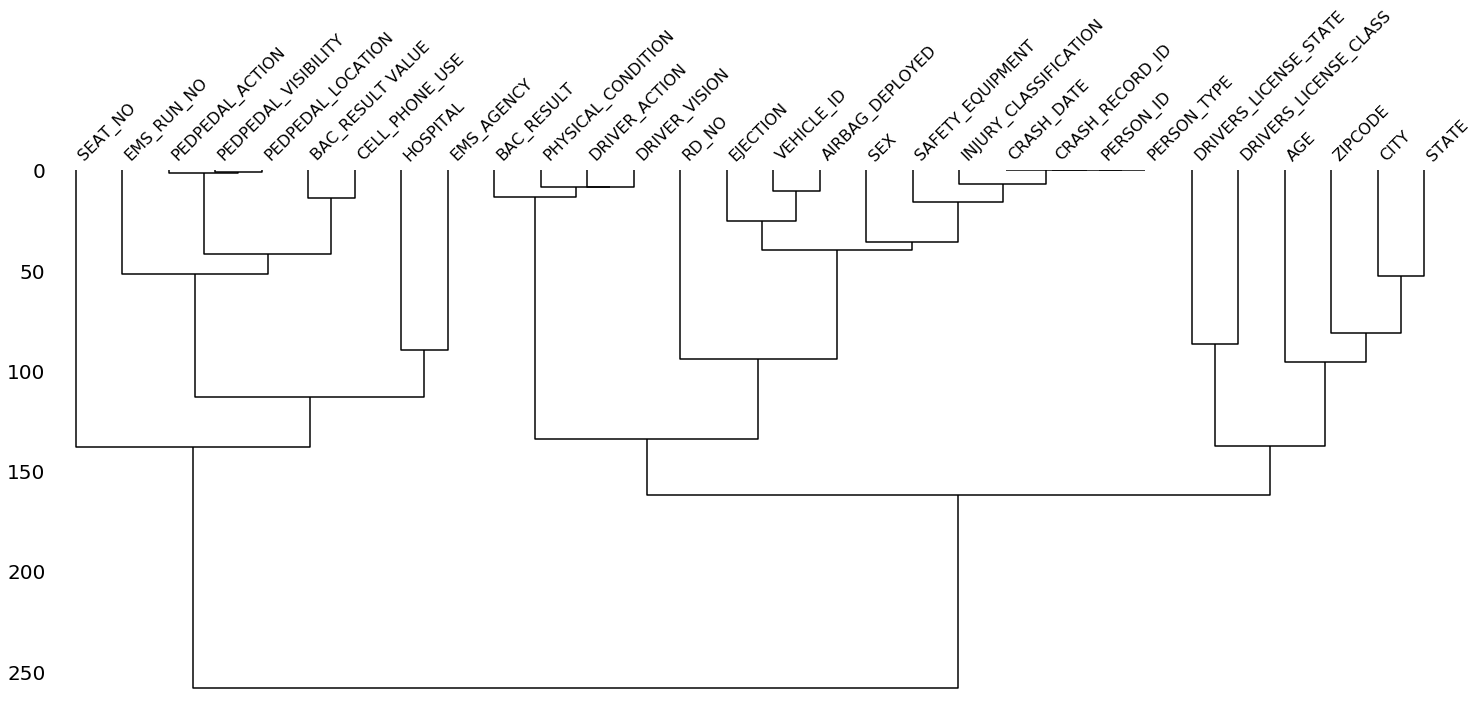

In [33]:
msno.dendrogram(people)

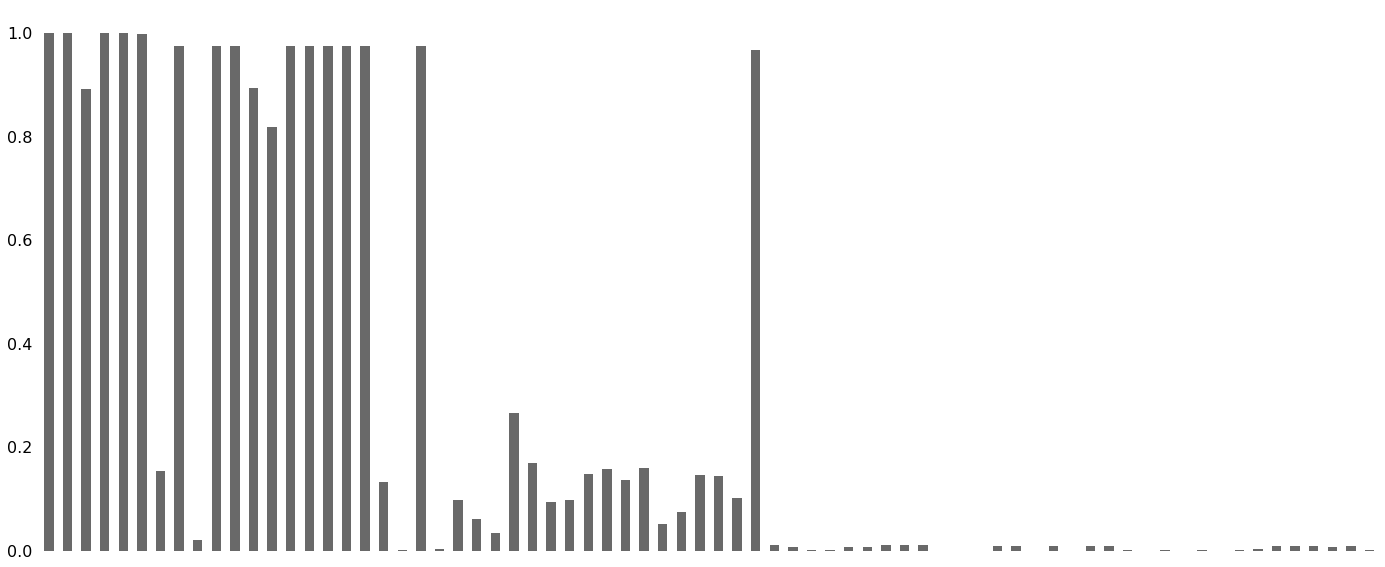

In [22]:
# Graphical analysis of missing values (vehicle)
msno.bar(vehicle)

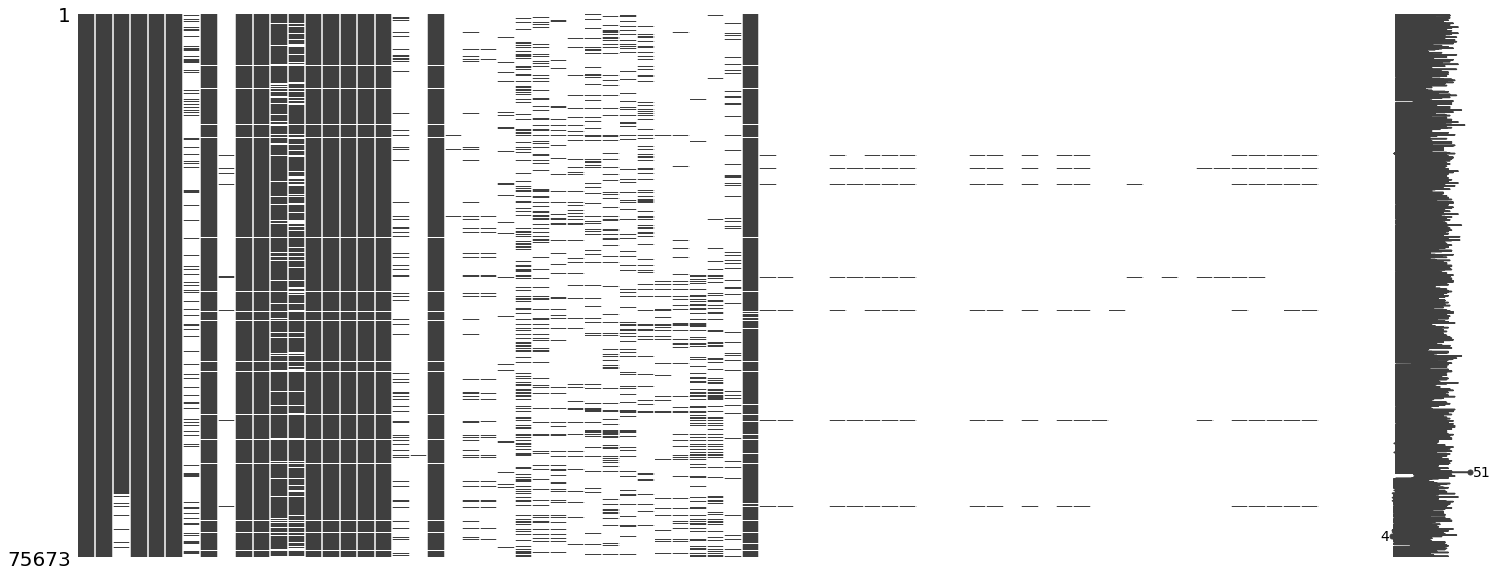

In [23]:
msno.matrix(vehicle)

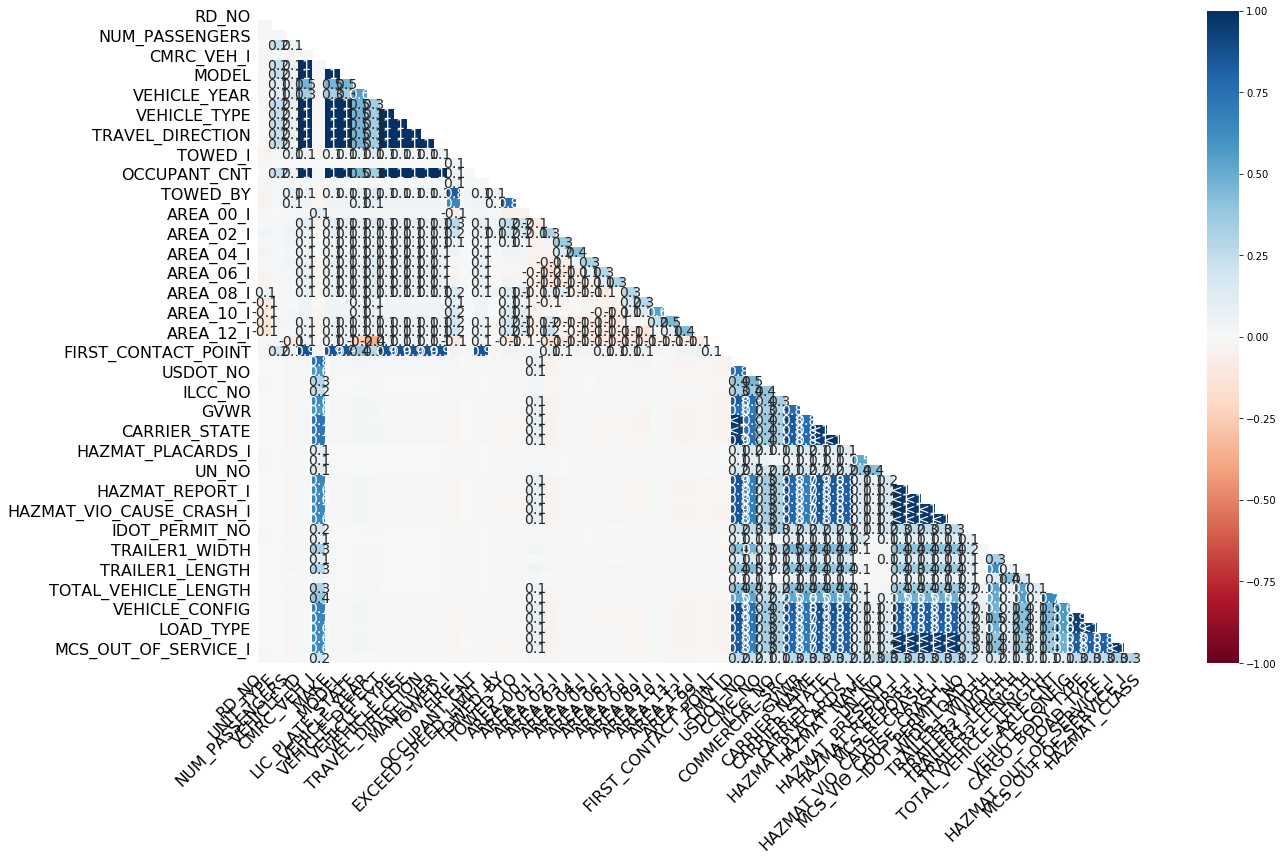

In [30]:
msno.heatmap(vehicle)

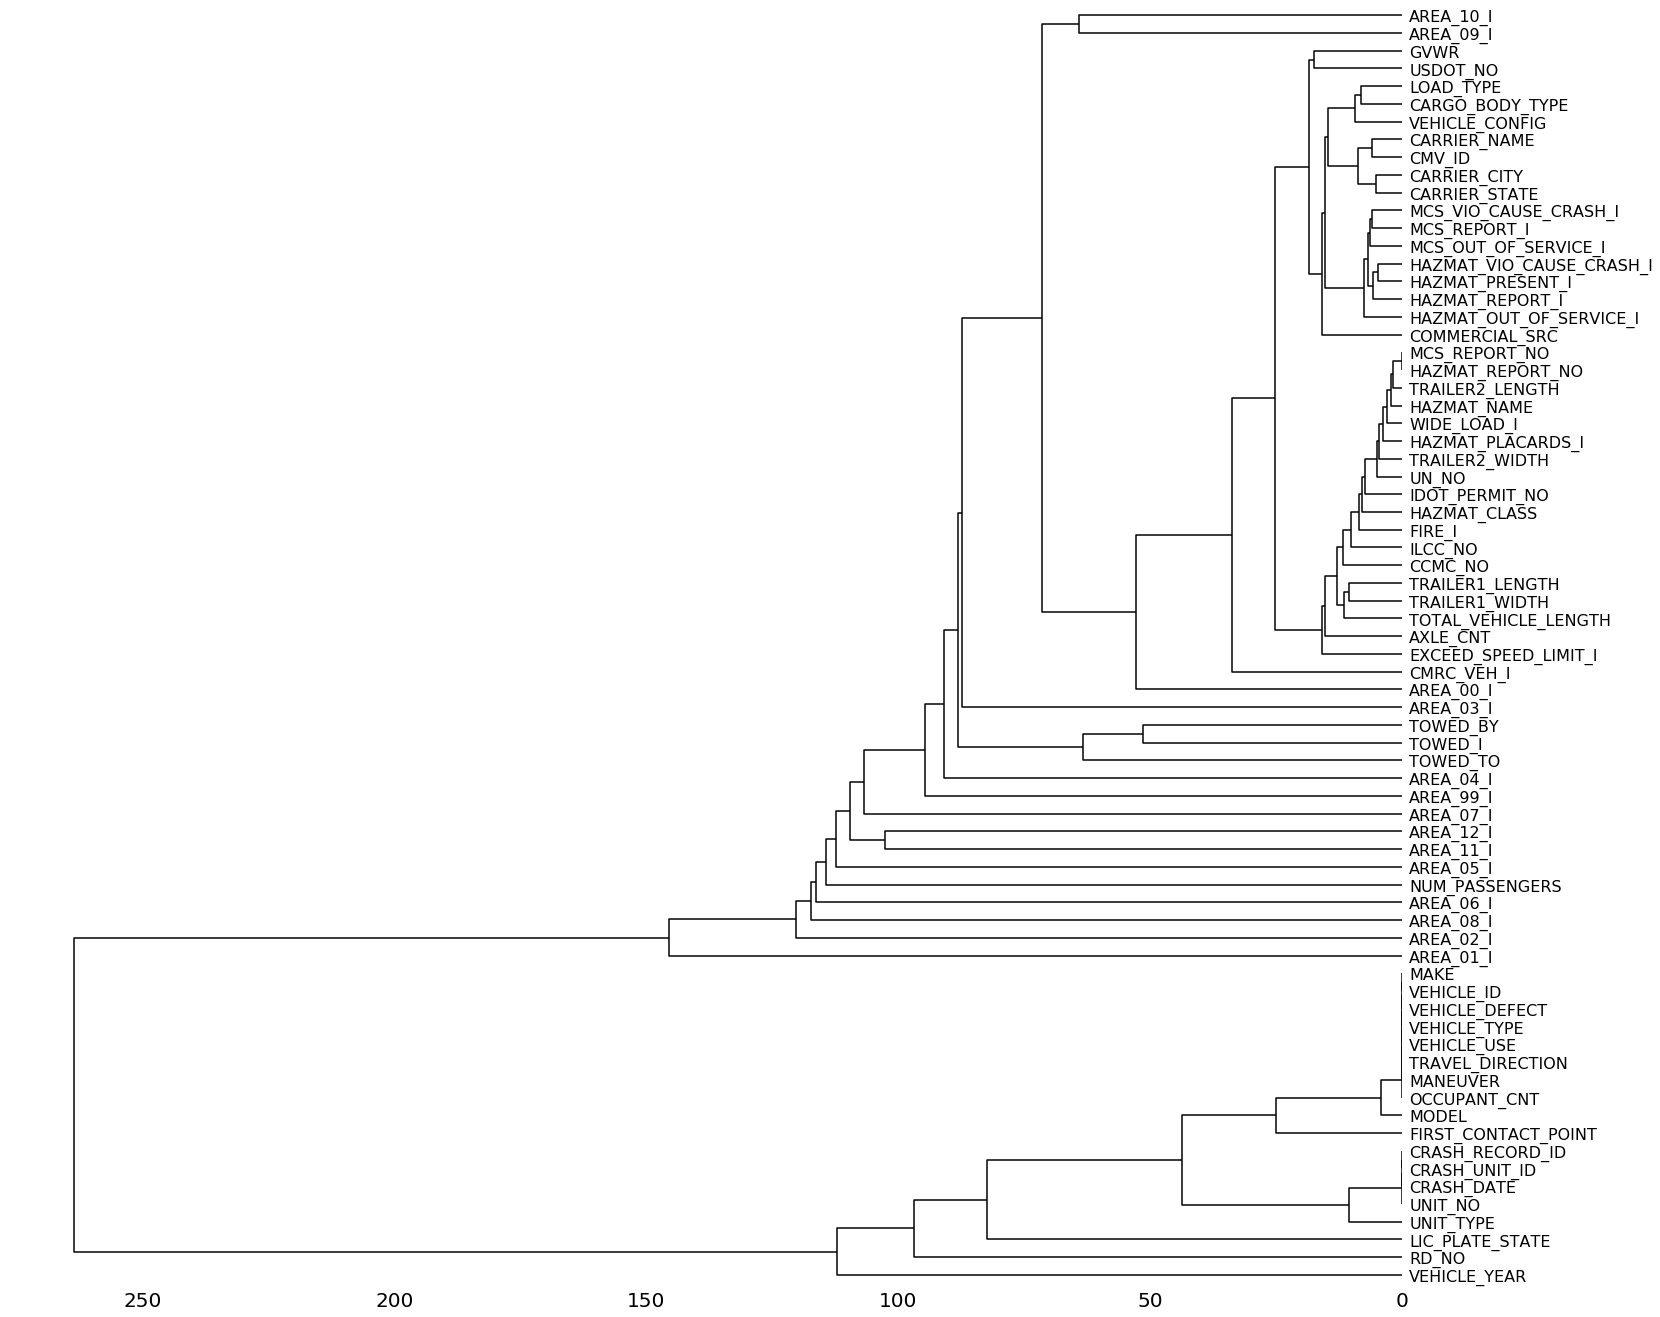

In [34]:
msno.dendrogram(vehicle)

## Missingness across variables

In [ ]:
# Pick up two correlated variables to prove hypothesis



# Association / Correlation

In [4]:
# Sample the datasets because it is too big

crashes_sample = crashes.sample(frac = .25)
people_sample = people.sample(frac = .25)
vehicle_sample = vehicle.sample(frac = .25)

### Correlation by using Dython library

In [95]:
#Find the correlation between features, both categorical and numerical
associations(crashes_sample, bias_correction=False)

In [ ]:
associations(people, bias_correction = False)

In [ ]:
associations(vehicle, bias_correction = False)

# Target Feature Selection

According to Business Understanding

##### Influencial Feature of crashes are 

CRASH_RECORD_ID, CRASH_DATE, POSTED_SPEED_LIMIT, TRAFFIC_CONTROL_DEVICE, DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, FIRST_CRASH_TYPE, ROADWAY_SURFACE_COND, ROAD_DEFECT, HIT_AND_RUN_I, DAMAGE, STREET_NAME, LOCATION

#####  Target Feature of crashes are 

CRASH_TYPE, INJURIES_TOTAL

---------------------------------------------------------------------------

##### Influencial Feature of people are 

PERSON_TYPE, CRASH_DATE, CITY, STATE, ZIPCODE, SEX, AGE, SAFETY_EQUIPMENT, AIRBAG_DEPLOYED, INJURY_CLASSIFICATION

#####  Target Feature of people is 

INJURY_CLASSIFICATION

---------------------------------------------------------------------------

##### Influencial Feature of vehicle are 

CRASH_RECORD_ID, CRASH_DATE, UNIT_TYPE, NUM_PASSENGERS, MAKE, VEHICLE_YEAR, VEHICLE_TYPE, OCCUPANT_CNT, 

#####  Target Feature of vehicle is 

Also should be injuries by connecting the datasets via CRASH_RECORD_ID


In [64]:
# Filter out columns according to the list above

filter_list = ["POSTED_SPEED_LIMIT", "TRAFFIC_CONTROL_DEVICE", 
                   "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION", "FIRST_CRASH_TYPE", 
                   "ROADWAY_SURFACE_COND", "ROAD_DEFECT", "HIT_AND_RUN_I", "DAMAGE", "STREET_NAME", 
                   "LOCATION", "CRASH_TYPE", "INJURIES_TOTAL"]

crashes_filter = crashes.filter(items = filter_list)
crashes_filter.head()
crashes_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POSTED_SPEED_LIMIT      33408 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE  33408 non-null  object 
 2   DEVICE_CONDITION        33408 non-null  object 
 3   WEATHER_CONDITION       33408 non-null  object 
 4   LIGHTING_CONDITION      33408 non-null  object 
 5   FIRST_CRASH_TYPE        33408 non-null  object 
 6   ROADWAY_SURFACE_COND    33408 non-null  object 
 7   ROAD_DEFECT             33408 non-null  object 
 8   HIT_AND_RUN_I           9694 non-null   object 
 9   DAMAGE                  33408 non-null  object 
 10  STREET_NAME             33408 non-null  object 
 11  LOCATION                33215 non-null  object 
 12  CRASH_TYPE              33408 non-null  object 
 13  INJURIES_TOTAL          33324 non-null  float64
dtypes: float64(1), int64(1), object(12)
me

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = crashes_filter.values
y = crashes_filter.values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs = -1, class_weight='balanced', max_depth = 5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)



# https://github.com/scikit-learn-contrib/boruta_py

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# split the columns into input (X) and output for modeling.
data = crashes_filter.copy()
dataset = data.values

X = dataset[:,0:-1]  #independent columns
y = dataset[:,-1]    #target column i.e price range

# format all fields as string
X = X.astype(str)


In [66]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [67]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [68]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

ValueError: Found unknown categories ['11', '24', '32', '60'] in column 0 during transform

In [96]:
# Feature Selection

# https://scikit-learn.org/stable/modules/feature_selection.html

# Time Series Calculation

In [65]:
# Conduct an analysis on crashes

crashes_ts = crashes.copy()

crashes_ts.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)


In [69]:
# Convert Crash_data into time

crashes_ts['CRASH_DATE'] = pd.to_datetime(crashes_ts.CRASH_DATE)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,2019-06-11 08:40:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,2018-05-09 11:30:00,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,2018-05-02 12:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,2018-07-31 11:25:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,2018-10-25 22:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)


In [71]:
# Creating three new columns for easy querying  

crashes_ts['YEAR'] = crashes_ts.CRASH_DATE.dt.year
crashes_ts['MONTH'] = crashes_ts.CRASH_DATE.dt.month
crashes_ts['DAY'] = crashes_ts.CRASH_DATE.dt.day

crashes_ts.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,DAY
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,2019-06-11 08:40:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028),2019,6,11
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,2018-05-09 11:30:00,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001),2018,5,9
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,2018-05-02 12:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018),2018,5,2
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,2018-07-31 11:25:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),2018,7,31
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,2018-10-25 22:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978),2018,10,25


In [92]:
# Function to compare considered feature with time

def time_pivot(data, x):
    tdf = data[['YEAR', x]].groupby(['YEAR', x]).size().rename('Count').reset_index()
    return pd.pivot_table(tdf, columns = 'YEAR', index = x)

In [91]:
# Time vs Crash Type

time_pivot(crashes_ts, "CRASH_TYPE").sort_values(by = ('Count', 2017), ascending = False)

Count                  
YEAR                              2017  2018  2019  2020
CRASH_TYPE                                              
NO INJURY / DRIVE AWAY            2074  8713  8446  4834
INJURY AND / OR TOW DUE TO CRASH   782  3239  3151  2169

In [90]:
# Time vs Street

time_pivot(crashes_ts, 'STREET_NAME').sort_values(by = ('Count', 2017), ascending = False)

Count                     
YEAR            2017   2018   2019   2020
STREET_NAME                              
WESTERN AVE     74.0  331.0  319.0  208.0
CICERO AVE      66.0  240.0  268.0  168.0
ASHLAND AVE     66.0  263.0  282.0  140.0
HALSTED ST      58.0  217.0  208.0  142.0
PULASKI RD      49.0  271.0  296.0  182.0
...              ...    ...    ...    ...
WISCONSIN ST     NaN    2.0    1.0    NaN
WOLF POINT PLZ   NaN    1.0    2.0    NaN
WOODLAND PARK    NaN    1.0    NaN    1.0
YALE AVE         NaN   11.0   11.0    6.0
ZEMKE RD         NaN    NaN    2.0    1.0

[1109 rows x 4 columns]

In [94]:
# Time vs Damages

time_pivot(crashes_ts, 'DAMAGE').sort_values(by = ('Count', 2017), ascending = False)

Count                  
YEAR           2017  2018  2019  2020
DAMAGE                               
OVER $1,500    1633  6926  6724  4328
$501 - $1,500   851  3418  3302  1929
$500 OR LESS    372  1608  1571   746

In [ ]:
# EDA of crashes

#Crash type
crashes.CRASH_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.CRASH_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

#Speed Limit
crashes.POSTED_SPEED_LIMIT.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.POSTED_SPEED_LIMIT.value_counts(normalize = True).plot.barh()
plt.show()

#Traffic Control
crashes.TRAFFIC_CONTROL_DEVICE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.TRAFFIC_CONTROL_DEVICE.value_counts(normalize = True).plot.barh()
plt.show()

#Weather Condition
crashes.WEATHER_CONDITION.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.WEATHER_CONDITION.value_counts(normalize = True).plot.barh()
plt.show()

#Weather Condition
crashes.WEATHER_CONDITION.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.WEATHER_CONDITION.value_counts(normalize = True).plot.pie()
plt.show()

#Crash Type
crashes.FIRST_CRASH_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.FIRST_CRASH_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

#Road Condition
crashes.ROADWAY_SURFACE_COND.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.ROADWAY_SURFACE_COND.value_counts(normalize = True).plot.barh()
plt.show()

#Road Defect
crashes.ROAD_DEFECT.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.ROAD_DEFECT.value_counts(normalize = True).plot.barh()
plt.show()

#Hit & Run
crashes.HIT_AND_RUN_I.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.HIT_AND_RUN_I.value_counts(normalize = True).plot.barh()
plt.show()

#Damage from crashes
crashes.DAMAGE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.DAMAGE.value_counts(normalize = True).plot.pie()
plt.show()




# EDA of people

#Person Type
people.PERSON_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
people.PERSON_TYPE.value_counts(normalize = True).plot.pie()
plt.show()

#Gender
people.SEX.value_counts(normalize = True)

#plot the bar graph of percentage
people.SEX.value_counts(normalize = True).plot.barh()
plt.show()

#Driving License, not relevant
people.DRIVERS_LICENSE_CLASS.value_counts(normalize = True)

#plot the bar graph of percentage
people.DRIVERS_LICENSE_CLASS.value_counts(normalize = True).plot.barh()
plt.show()


# EDA of vehicles

#Vehicle brand
vehicle.MAKE.value_counts(normalize = True)

#plot the bar graph of percentage
vehicle.MAKE.value_counts(normalize = True).plot.barh()
plt.show()

#Vehicle Year
vehicle.VEHICLE_YEAR.value_counts(normalize = True)

#plot the bar graph of percentage
vehicle.VEHICLE_YEAR.value_counts(normalize = True).plot.barh()
plt.show()



In [6]:
# Remove missing value with more than 50% missing

# count() does not include NaN values

# For crashes
crashes2 = crashes[[column for column in crashes if crashes[column].count() / len(crashes) >= 0.5]]

print("List of dropped columns of crahes:", end = " ")
for c in crashes.columns:
    if c not in crashes2.columns:
        print(c, end = ", ")
print('\n')
crashes = crashes2

# For people
people2 = people[[column for column in people if people[column].count() / len(people) >= 0.5]]

print("List of dropped columns of people:", end = " ")
for c in people.columns:
    if c not in people2.columns:
        print(c, end = ", ")
print('\n')
people = people2

# For vehicle
vehicle2 = vehicle[[column for column in vehicle if vehicle[column].count() / len(vehicle) >= 0.5]]

print("List of dropped columns of vehicle:", end = " ")
for c in vehicle.columns:
    if c not in vehicle2.columns:
        print(c, end = ", ")
print('\n')
vehicle = vehicle2

crashes.info()
people.info()
vehicle.info()

List of dropped columns of crahes: CRASH_DATE_EST_I, LANE_CNT, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, 

List of dropped columns of people: SEAT_NO, HOSPITAL, EMS_AGENCY, EMS_RUN_NO, PEDPEDAL_ACTION, PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION, BAC_RESULT VALUE, CELL_PHONE_USE, 

List of dropped columns of vehicle: NUM_PASSENGERS, CMRC_VEH_I, TOWED_I, FIRE_I, EXCEED_SPEED_LIMIT_I, TOWED_BY, TOWED_TO, AREA_00_I, AREA_01_I, AREA_02_I, AREA_03_I, AREA_04_I, AREA_05_I, AREA_06_I, AREA_07_I, AREA_08_I, AREA_09_I, AREA_10_I, AREA_11_I, AREA_12_I, AREA_99_I, CMV_ID, USDOT_NO, CCMC_NO, ILCC_NO, COMMERCIAL_SRC, GVWR, CARRIER_NAME, CARRIER_STATE, CARRIER_CITY, HAZMAT_PLACARDS_I, HAZMAT_NAME, UN_NO, HAZMAT_PRESENT_I, HAZMAT_REPORT_I, HAZMAT_REPORT_NO, MCS_REPORT_I, MCS_REPORT_NO, HAZMAT_VIO_CAUSE_CRASH_I, MCS_VIO_CAUSE_CRASH_I, IDOT_PERMIT_NO, WIDE_LOAD_I, TRAILER1_WIDTH, TRAILER2_WIDTH, T

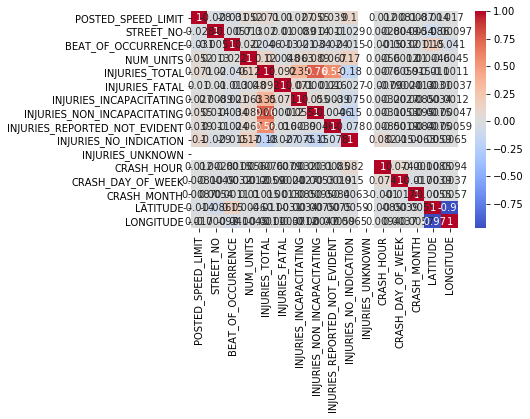

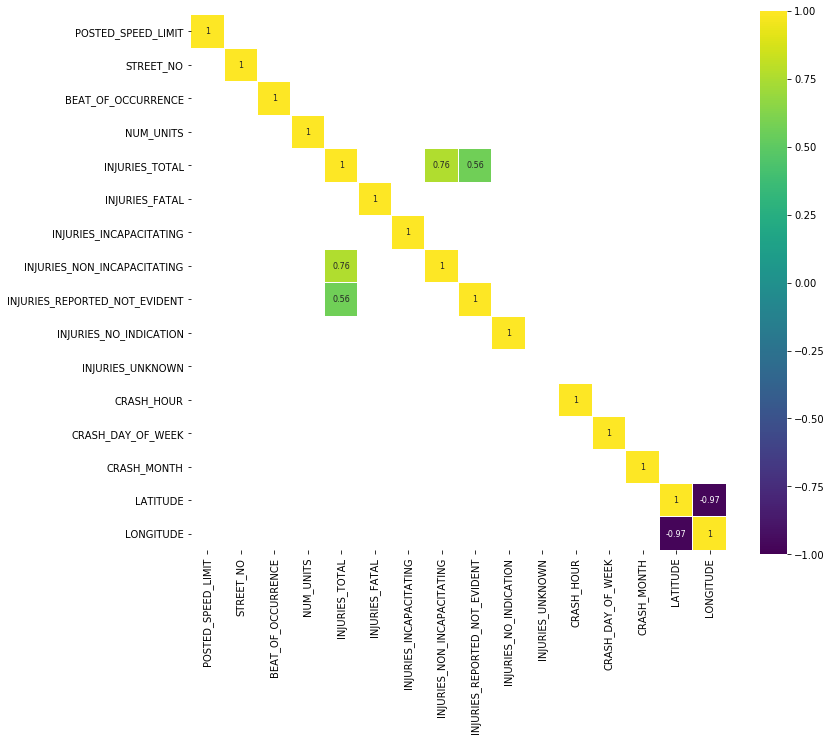

In [21]:
# Coorelation of Crahes data set
sns.heatmap(crashes.corr(method = "pearson"), annot = True, cmap = "coolwarm")



corr = crashes.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

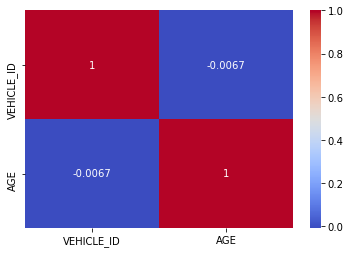

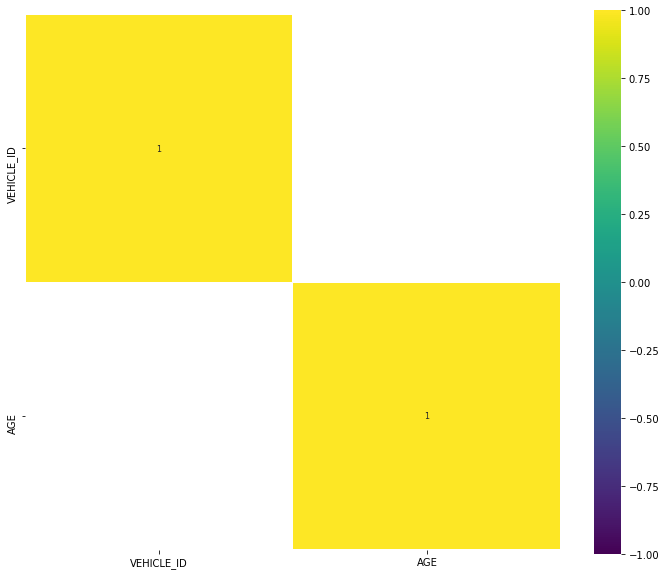

In [19]:
# Coorelation of People data set
sns.heatmap(people.corr(method = "pearson"), annot = True, cmap = "coolwarm")


corr = people.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

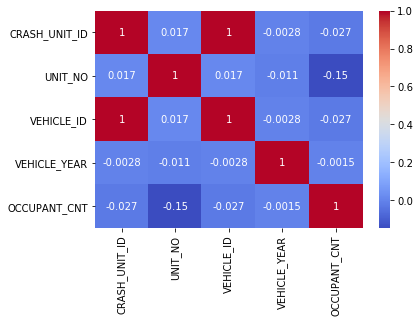

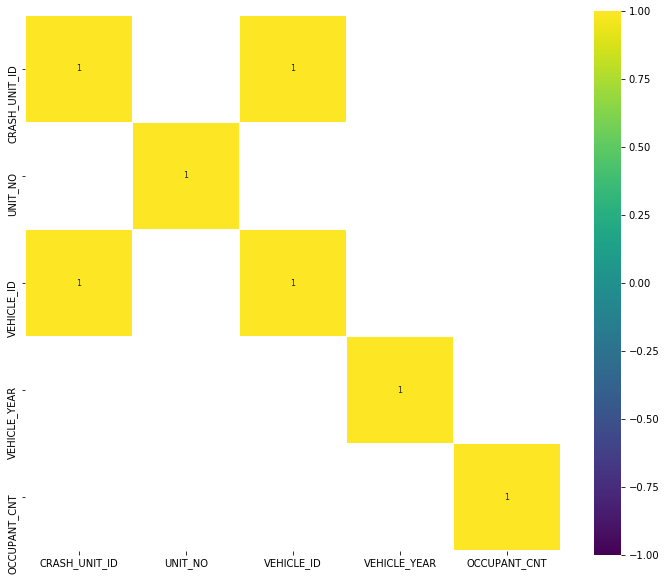

In [18]:
# Coorelation of vehicle data set
sns.heatmap(vehicle.corr(method = "pearson"), annot = True, cmap = "coolwarm")


corr = vehicle.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
fig, axes = plt.subplots(round(len(people.columns) / 3), 3, figsize = (12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(people.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
        sns.countplot(x = people.columns[i], alpha = 0.7, data = people, ax = ax)

fig.tight_layout()

In [38]:
#References


#https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

#https://medium.com/analytics-vidhya/machine-learning-with-python-eda-cleaning-feature-engineering-and-ensemble-model-assessment-e09d7e1accb